<a href="https://colab.research.google.com/github/devrajpatel/emotion_hindi/blob/main/Emotion_Hindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, LSTM, GRU, Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import optimizers
from tensorflow.python.keras import layers
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional

In [ ]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
uploaded = "/content/gdrive/MyDrive/Colab Notebooks/emotions.csv"
df = pd.read_csv(uploaded)

In [ ]:
df.head()
print(df)

                                             Sentences    Label
0          मेरे ट्रैन का बुकिंग फेल हो रहा है बार बार     angry
1        मेरे फ्लाइट  का बुकिंग फेल हो रहा है बार बार     angry
2                       क्या बेकार की बातें कर रहे हो     angry
3                        क्या बताओ यार मूड ही ख़राब है     angry
4                   आप ऐसे कैसे मेरा पैसा काट सकते हो     angry
..                                                 ...      ...
658  आपका सद्भाव हमारा विश्वास कांग्रेस का विचार सम...  neutral
659  को_बहाल_करो सरकार के पास एक भी   नहीं है रीट र...  disgust
660  का इंतजार खत्म परीक्षा के लिए शिक्षा विभाग तैय...    happy
661  ॥जल ही जीवन है॥ विश्व जल दिवस के अवसर पर आओ सं...    happy
662  का केजरीवाल से मिलना )मनीष तिवारी कांग्रेस का ...  disgust

[663 rows x 2 columns]


In [ ]:
df.shape

(663, 2)

In [ ]:
y = df["Label"]
X = df.drop(["Label"], axis = 1)
print(y)

0        angry
1        angry
2        angry
3        angry
4        angry
        ...   
658    neutral
659    disgust
660      happy
661      happy
662    disgust
Name: Label, Length: 663, dtype: object


In [ ]:
# 80/20/20 train/test/val split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X_train.head()

,Sentences
84,फ़क ऑफ़
229,तुम तोह काफी इंटेलीजेंट हो
1,मेरे फ्लाइट का बुकिंग फेल हो रहा है बार बार
252,ये तो अच्छा है
429,कैब ड्राइवर गधा था


In [ ]:
tk = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n')


tk.fit_on_texts(X['Sentences'])

# + 1 for unknown token
vocab_size = len(tk.word_index) +1

X_train_seq = tk.texts_to_sequences(X_train['Sentences'])
X_test_seq = tk.texts_to_sequences(X_test['Sentences'])
X_val_seq = tk.texts_to_sequences(X_val['Sentences'])
# Initializing max length of sentence to 20 words
max_length = 20

In [ ]:
tk.word_index

{'है': 1,
 'के': 2,
 'की': 3,
 'में': 4,
 'से': 5,
 'को': 6,
 'का': 7,
 'हो': 8,
 'नहीं': 9,
 'क्या': 10,
 'और': 11,
 'कर': 12,
 'पर': 13,
 'ने': 14,
 'ये': 15,
 'एक': 16,
 'यार': 17,
 'ही': 18,
 'बहुत': 19,
 'गया': 20,
 'भी': 21,
 'तो': 22,
 'था': 23,
 'दुनिया': 24,
 'रहा': 25,
 'भारत': 26,
 'बार': 27,
 'हैं': 28,
 'लिए': 29,
 'आज': 30,
 'तुम': 31,
 'होटल': 32,
 'जी': 33,
 'कैब': 34,
 'किया': 35,
 'करने': 36,
 'काम': 37,
 'मेरे': 38,
 'बुक': 39,
 'जो': 40,
 'रहे': 41,
 'तक': 42,
 'अच्छा': 43,
 'संकट': 44,
 'मै': 45,
 'कैसे': 46,
 'मेरा': 47,
 'थी': 48,
 'पैसे': 49,
 'कि': 50,
 'फ्लाइट': 51,
 'कुछ': 52,
 'क्यों': 53,
 'इस': 54,
 'मुझे': 55,
 'आ': 56,
 'सर्विस': 57,
 'भाई': 58,
 'मेरी': 59,
 'आप': 60,
 'एप': 61,
 'कब': 62,
 'दिया': 63,
 'मे': 64,
 'करना': 65,
 'बात': 66,
 'करो': 67,
 'बोलना': 68,
 'रिचार्ज': 69,
 'समझ': 70,
 'सबसे': 71,
 'हुआ': 72,
 'यह': 73,
 'सरकार': 74,
 'ट्रैन': 75,
 'मैं': 76,
 'होगा': 77,
 'कोई': 78,
 'अरे': 79,
 'दी': 80,
 'अकाउंट': 81,
 'टिकट': 82,
 'चाहिए': 83,

In [ ]:
print(vocab_size)

2056


In [ ]:
X_train_seq

[[498, 879],
 [31, 493, 95, 930, 8],
 [38, 51, 7, 103, 471, 8, 25, 1, 27, 27],
 [15, 22, 43, 1],
 [34, 113, 350, 23],
 [19, 216, 265, 1, 15, 61],
 [94, 1049, 23, 32, 4],
 [10, 69, 65, 83],
 [133,
  133,
  133,
  133,
  133,
  133,
  133,
  133,
  133,
  59,
  1111,
  38,
  296,
  297,
  1112,
  586,
  26,
  587,
  296,
  297,
  1113,
  1114],
 [55, 22, 15, 89, 19, 43, 267, 1],
 [38, 81, 7, 210, 968, 969],
 [69, 36, 2, 29, 92, 38, 917],
 [56, 275, 129, 31, 280, 8],
 [177,
  751,
  2009,
  2,
  29,
  786,
  806,
  807,
  808,
  809,
  26,
  801,
  449,
  328,
  202,
  2010,
  2011,
  7,
  317,
  785,
  688,
  806,
  807,
  808,
  2,
  2012,
  2013,
  2014,
  2015,
  668,
  784,
  809,
  2,
  2016,
  4,
  30,
  662,
  4,
  771,
  2017,
  2018,
  72],
 [56, 275, 129, 31, 160, 8],
 [96, 363, 488, 213, 80, 17],
 [101, 55, 19, 571, 12, 63],
 [73, 22, 19, 43, 282, 1],
 [16, 270, 37, 35, 1, 58, 126],
 [221],
 [127, 37, 35, 58],
 [332,
  4,
  118,
  150,
  199,
  701,
  128,
  1,
  332,
  4,
  3

In [ ]:
#padding the sequences to make all the input sequences of the same length

X_train_seq_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_seq_pad = pad_sequences(X_test_seq, maxlen=max_length,padding='post')
X_val_seq_pad = pad_sequences(X_val_seq, maxlen=max_length,padding='post')

In [ ]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)
y_val_le = le.fit_transform(y_val)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)
y_val_oh = to_categorical(y_val_le)

In [ ]:
X_train_seq_pad

array([[ 498,  879,    0, ...,    0,    0,    0],
       [  31,  493,   95, ...,    0,    0,    0],
       [  38,   51,    7, ...,    0,    0,    0],
       ...,
       [ 483,  181,    8, ...,    0,    0,    0],
       [1026,  209,   83, ...,    0,    0,    0],
       [ 252,  824,   27, ...,    0,    0,    0]], dtype=int32)

In [ ]:
print(f"Input: {X_val_seq_pad.shape}, Output: {y_val_oh.shape}")
print(f"Input: {X_train_seq_pad.shape}, Output: {y_train_oh.shape}")

Input: (106, 20), Output: (106, 5)
Input: (424, 20), Output: (424, 5)


In [ ]:
emb_dims = 256
l2_decay = 0.000001
model = Sequential()
model.add(Embedding(vocab_size, emb_dims, input_length=max_length, embeddings_regularizer = tf.keras.regularizers.l2(l2_decay)))
model.add(Bidirectional(LSTM(32, return_sequences=True), input_shape=(max_length, emb_dims)))
model.add(Bidirectional(LSTM(32)))
model.add(Flatten())
model.add(Dense(25, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_47 (Embedding)     (None, 20, 256)           526336    
_________________________________________________________________
module_wrapper_18 (ModuleWra (None, 20, 64)            73984     
_________________________________________________________________
module_wrapper_19 (ModuleWra (None, 64)                24832     
_________________________________________________________________
flatten_16 (Flatten)         (None, 64)                0         
_________________________________________________________________
module_wrapper_20 (ModuleWra (None, 25)                1625      
_________________________________________________________________
module_wrapper_21 (ModuleWra (None, 5)                 130       
Total params: 626,907
Trainable params: 626,907
Non-trainable params: 0
_______________________________________________

In [ ]:
history = model.fit(X_train_seq_pad, y_train_oh, epochs = 128, batch_size = 128, validation_data=(X_val_seq_pad, y_val_oh), shuffle=False)

Epoch 1/128
4/4 [==============================] - 9s 619ms/step - loss: 1.5951 - accuracy: 0.2406 - val_loss: 1.5469 - val_accuracy: 0.3208
Epoch 2/128
4/4 [==============================] - 0s 100ms/step - loss: 1.5393 - accuracy: 0.2736 - val_loss: 1.4859 - val_accuracy: 0.3396
Epoch 3/128
4/4 [==============================] - 0s 101ms/step - loss: 1.4747 - accuracy: 0.2830 - val_loss: 1.4438 - val_accuracy: 0.3491
Epoch 4/128
4/4 [==============================] - 0s 97ms/step - loss: 1.4175 - accuracy: 0.3137 - val_loss: 1.4459 - val_accuracy: 0.3491
Epoch 5/128
4/4 [==============================] - 0s 97ms/step - loss: 1.3876 - accuracy: 0.3255 - val_loss: 1.4439 - val_accuracy: 0.3679
Epoch 6/128
4/4 [==============================] - 0s 98ms/step - loss: 1.3621 - accuracy: 0.4057 - val_loss: 1.4300 - val_accuracy: 0.3585
Epoch 7/128
4/4 [==============================] - 0s 100ms/step - loss: 1.3320 - accuracy: 0.4929 - val_loss: 1.4245 - val_accuracy: 0.3962
Epoch 8/128
4/4 

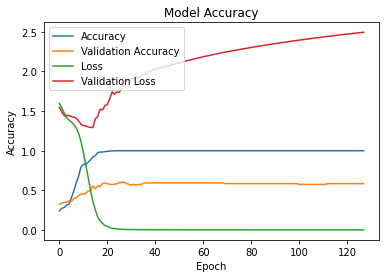

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [ ]:
results = model.evaluate(X_test_seq_pad, y_test_oh)
print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(results[1]*100))

5/5 [==============================] - 0s 10ms/step - loss: 2.5077 - accuracy: 0.5940
/n
Test accuracy of word embeddings model: 59.40%


In [ ]:
results = model.evaluate(X_val_seq_pad, y_val_oh)
print('/n')
print('Validation accuracy of word embeddings model: {0:.2f}%'.format(results[1]*100))

4/4 [==============================] - 0s 11ms/step - loss: 2.4951 - accuracy: 0.5849
/n
Validation accuracy of word embeddings model: 58.49%
